
<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="200" title="Tail Logo" /></a>

# <font color ="#00b8ff">Aválise de Vendas de Videogame</font>

### O seguinte projeto tem por objetivo treinar a manipulação básica de algumas bibliotecas do Python, tais como Pandas, Matplotlib e Seaborn.

#####Equipe: Marília, Jonas, Gisele, Hermano, João Victor, Maria Eduarda e Raffael.

In [ ]:
# Importando as bibliotecas utilizadas

import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

In [ ]:
# Importando csv do link https://raw.githubusercontent.com/mariliabrito/videogamesales/main/Video_Games.csv
gameset = pd.read_csv("https://raw.githubusercontent.com/mariliabrito/videogamesales/main/Video_Games.csv")

# <font color ="#00b8ff">Parte 1 - Introdução do Dataset </font>




In [ ]:
# Verificando cabeçalho
gameset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Descrição das variáveis

Name:

Platform:

Year_of_Release:

Genre:

Publisher:

NA_Sales:

EU_Sales:

JP_Sales:

Other_Sales:

Global_Sales:

Critic_Score:

Critic_Count:

User_Score:

User_Count:

Developer:

Rating:

In [ ]:
#Verificando informações
gameset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
# Verificando estatística descritiva

gameset.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [ ]:
# Verificando value counts na coluna Name

gameset['Name'].value_counts()

Need for Speed: Most Wanted                         12
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11562, dtype: int64

In [ ]:
# Verificando quantos gêneros únicos de game existem com .unique()
gameset['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

# <font color ="#00b8ff">Parte 2 - Limpeza </font>

In [ ]:
# Uniformizando cabeçalho, deixe-o em caixa baixa (minúsculo)
gameset.columns = gameset.columns.str.lower()
gameset.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verifique valores únicos na coluna Publisher

gameset['publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',


In [ ]:
# Deixe em minúsculo os nomes dos publishers, conte valores únicos e veja se houve alteração

In [ ]:
len(gameset['publisher'].unique())

582

In [ ]:
len(gameset['publisher'].str.lower().unique())

582

In [ ]:
gameset['publisher']=gameset['publisher'].str.lower()

In [ ]:
# Verificando existência de valores duplicados
gameset.duplicated().sum()

0

In [ ]:
# Verificando existência de valores NAN
gameset.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

array([[<Axes: title={'center': 'year_of_release'}>,
        <Axes: title={'center': 'na_sales'}>,
        <Axes: title={'center': 'eu_sales'}>],
       [<Axes: title={'center': 'jp_sales'}>,
        <Axes: title={'center': 'other_sales'}>,
        <Axes: title={'center': 'global_sales'}>],
       [<Axes: title={'center': 'critic_score'}>,
        <Axes: title={'center': 'critic_count'}>,
        <Axes: title={'center': 'user_count'}>]], dtype=object)

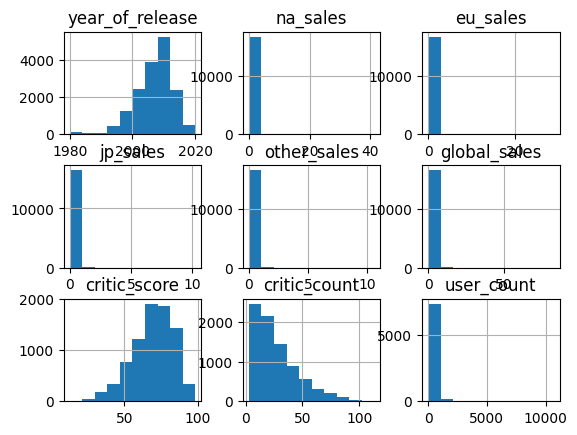

In [ ]:
# Verifique distribuições .hist() antes de tratar NaN
gameset.hist() ###perguntar

In [ ]:
# Utilizando média para preencher NaN na coluna critic count
nan_media = gameset['critic_count'].fillna(gameset['critic_count'].mean())

<Axes: >

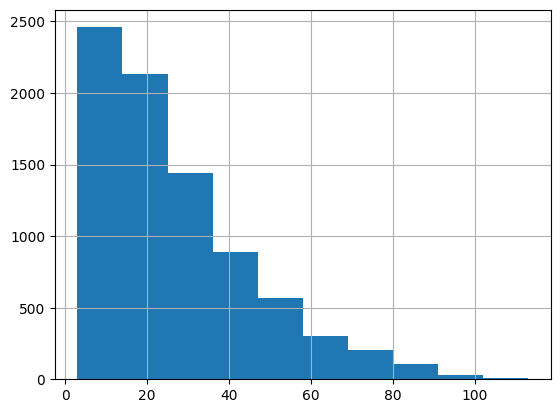

In [ ]:
# Verificando se houve mudança significativa na distribuição da variável com .hist()
gameset['critic_count'].hist()

<Axes: >

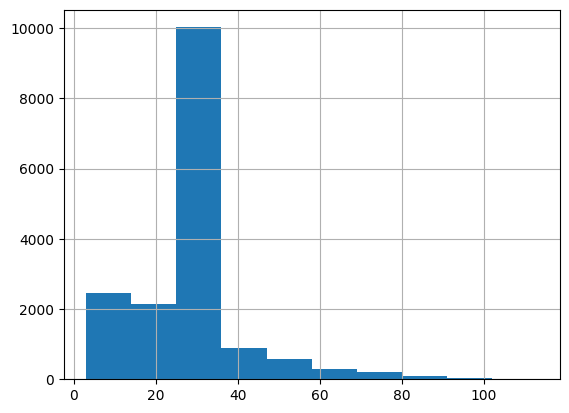

In [ ]:
nan_media.hist()

OPS! Observe que quando a há muitos valores NaN (nesse caso, aproximadamente 50%), é preferível utilizar outras formas para preencher valores NaN, tais como substituindo por valores interpolados ou procurando valores já existentes na mesma coluna. Importante frisar que depende do tipo de dado a ser preenchido. Caso o dado fosse a temperatura da cidade de João Pessoa durante as manhãs do mês de março, que devem variar entre 28°C e 31°C, utilizar a média não causaria uma distorção.

In [ ]:
# Preenchendo NaN da coluna Critic Score com valores interpolados pelo método linear

nan_interpol = gameset['critic_score'].fillna(gameset['critic_score'].interpolate(method='linear'))

<Axes: >

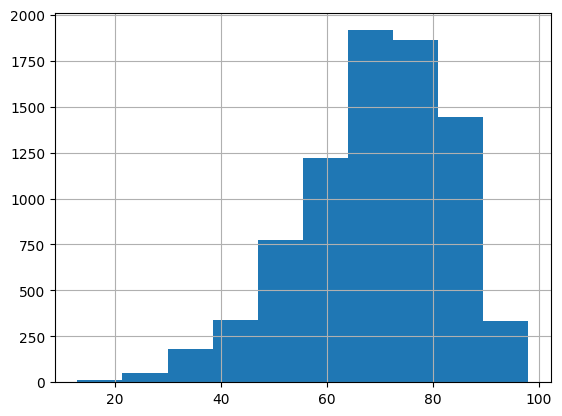

In [ ]:
# Verificando distribuição (.hist()) do Critic Score após interpolação
gameset['critic_score'].hist()

<Axes: >

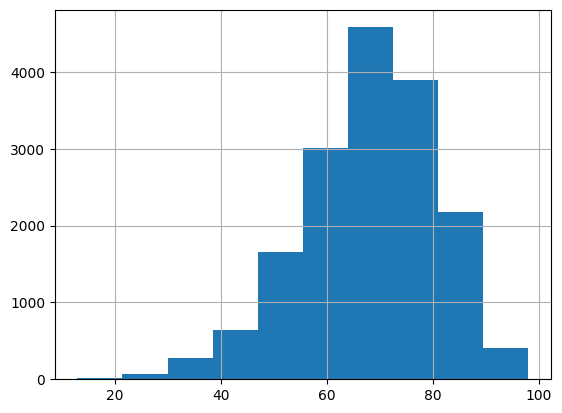

In [ ]:
nan_interpol.hist()

<Axes: >

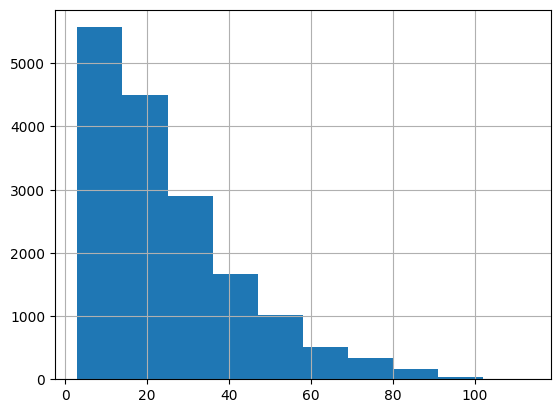

In [ ]:
# Preenchendo NaN da coluna Critic Count com valores interpolados k-nn

nan_interpol_knn = gameset['critic_count'].fillna(gameset['critic_count'].interpolate(method='nearest'))
nan_interpol_knn.hist()

In [ ]:
# Agrupando por nome e ano de lançamento
nome_ano = gameset.groupby('name')['year_of_release'].mean().dropna()
nome_ano

name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART FAMILY!              2010.0
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11429, dtype: float64

In [ ]:
# Preenchendo NaN no ano de lançamento com .map() no groupby
gameset['year_of_release'] = gameset['year_of_release'].fillna(gameset['year_of_release'].map(nome_ano))

In [ ]:
# Agrupando por nome e publisher
nome_pub = gameset.groupby('name')['publisher'].unique().dropna()
nome_pub

name
 Beyblade Burst                                      [furyu]
 Fire Emblem Fates                                [nintendo]
 Frozen: Olaf's Quest           [disney interactive studios]
 Haikyu!! Cross Team Match!             [namco bandai games]
 Tales of Xillia 2                      [namco bandai games]
                                            ...             
thinkSMART: Chess for Kids              [mentor interactive]
uDraw Studio                                           [thq]
uDraw Studio: Instant Artist                           [thq]
wwe Smackdown vs. Raw 2006                             [nan]
¡Shin Chan Flipa en colores!                     [505 games]
Name: publisher, Length: 11562, dtype: object

In [ ]:
# Preenchendo NaN no publisher com .map()
gameset['publisher'] = gameset['publisher'].fillna(gameset['publisher'].map(nome_pub))